In [3]:
def extract_VGG16(tensor):
    from keras.applications.vgg16 import VGG16, preprocess_input
    return VGG16(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_VGG19(tensor):
    from keras.applications.vgg19 import VGG19, preprocess_input
    return VGG19(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Resnet50(tensor):
    from keras.applications.resnet50 import ResNet50, preprocess_input
    return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Xception(tensor):
    from keras.applications.xception import Xception, preprocess_input
    return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_InceptionV3(tensor):
    from keras.applications.inception_v3 import InceptionV3, preprocess_input
    return InceptionV3(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [12]:
from keras.preprocessing import image
img_path = './1.jpg'

In [16]:
import numpy as np
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

In [27]:
bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
bottleneck_feature.shape

(1, 7, 7, 512)

In [28]:
bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
bottleneck_feature.shape

(1, 7, 7, 512)

In [29]:
bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
bottleneck_feature.shape

(1, 1, 1, 2048)

In [30]:
bottleneck_feature = extract_Xception(path_to_tensor(img_path))
bottleneck_feature.shape

(1, 7, 7, 2048)

In [31]:
bottleneck_feature = extract_InceptionV3(path_to_tensor(img_path))
bottleneck_feature.shape

(1, 5, 5, 2048)

In [44]:
img = image.load_img('./1.jpg', target_size=(224, 224) ,grayscale=True)
img.show()

In [45]:
img = image.img_to_array(img)
print(img.shape)

(224, 224, 1)


In [62]:
image.array_to_img(np.concatenate([img, img, img], axis=-1), gra).show()

In [10]:
import pickle

def load_data_from_pkl(data_path, verbose=True):
    """Load data from pickle file."""
    with open(data_path, 'rb') as f:
        if verbose:
            print('Loading {}...'.format(f.name))
        return pickle.load(f)

x_test = load_data_from_pkl('../data/source_data/mnist/test_images.p')

Loading ../data/source_data/mnist/test_images.p...


In [16]:
import numpy as np
import math
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
def square_grid_show_imgs(images, mode=None):
  """Save images as a square grid."""
  # Get maximum size for square grid of images
  img_size = math.floor(np.sqrt(images.shape[0]))

  # Scale to 0-255
  images = (
        ((images - images.min()) * 255) / (images.max() - images.min())).astype(
    np.uint8)

  # Put images in a square arrangement
  images_in_square = np.reshape(
      images[:img_size * img_size],
      (img_size, img_size, images.shape[1], images.shape[2], images.shape[3]))

  # images_in_square.shape = (5, 5, 28, 28, 1)

  if mode == 'L':
    cmap = 'gray'
    images_in_square = np.squeeze(images_in_square, 4)
  else:
    cmap = None

  # Combine images to grid image
  new_im = Image.new(mode,
                     (images.shape[1] * img_size, images.shape[2] * img_size))
  for row_i, row_images in enumerate(images_in_square):
    for col_i, image in enumerate(row_images):
      im = Image.fromarray(image, mode)
      new_im.paste(im, (col_i * images.shape[1], row_i * images.shape[2]))

  plt.imshow(np.array(new_im), cmap=cmap)
  plt.show()


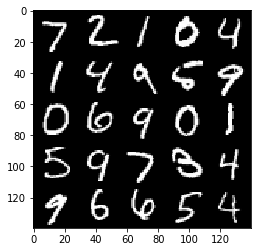

In [17]:
square_grid_show_imgs(np.array(x_test[:25], dtype=np.float32), mode='L')

In [19]:
def img_resize(imgs, img_shape, img_mode='L', resize_filter=Image.ANTIALIAS):
  """Resize images"""
  resized_imgs = []
  for img in imgs:
    if img_mode == 'L':
      img = np.squeeze(img, axis=-1)
    img = Image.fromarray(img.astype('uint8'), mode=img_mode)
    resized_img = np.expand_dims(
        img.resize(img_shape, resize_filter), axis=-1)
    resized_imgs.append(resized_img)
  return np.array(resized_imgs)

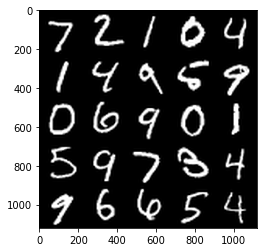

In [23]:
x_test_new = img_resize(np.array(x_test, dtype=np.float32), (224, 224))
square_grid_show_imgs(np.array(x_test_new[:25], dtype=np.float32), mode='L')